In [12]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import root
from scipy.optimize import minimize

In [6]:
#Problem #du/dx = -u^2 # u(0) = 1 # From https://en.wikipedia.org/wiki/Nonlinear_system
#True Solution u(x) = 1/(x+1)

def true_fun(x):
    return 1/(x+1)

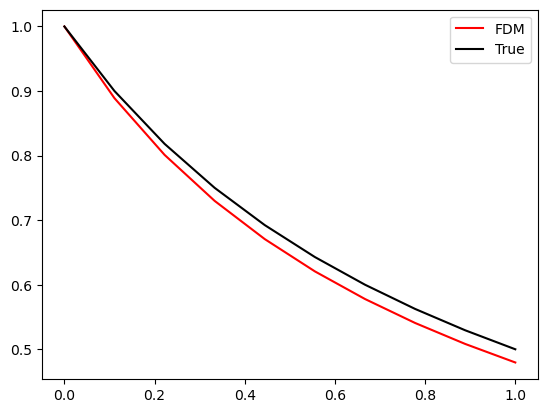

In [40]:
#FDM #Forward Difference (Since initial is given?)

L = 1.0
N = 10

x = np.linspace(0, L, N)
delx = L / (N-1)

u = np.zeros((N,1)) #ones because initial condition is u(0) = 1
u[0] = 1

for i in range(1,N):
    u[i] = delx*(-1*(u[i-1]**2)) + u[i-1]

fig,ax = plt.subplots()
ax.plot(x,u,'r',label = "FDM")
ax.plot(x,true_fun(x),'k',label = "True")
ax.legend()


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.0
        x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
      nit: 0
      jac: [ 2.500e+05  7.500e+05 ...  7.500e+05  2.500e+05]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 50714
     njev: 101


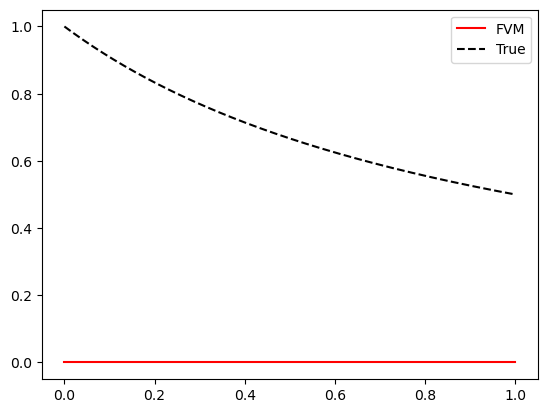

In [39]:
#FVM
# Define the parameters
L = 1.0
N = 500
dx = L / N
x = np.linspace(0, L, N+1)

# Define the source term f(x)
f = np.zeros(N+1)  # Example: f(x) = 1 for simplicity

# Define the boundary conditions
u0 = 0.0  # u(0) = u0
uL = 0.0  # u(L) = uL


# Set up the matrix A and vector b
A = np.zeros((N+1, N+1))
b = np.zeros((N+1,1))

# Fill the matrix A
for i in range(1, N):
    A[i, i-1] = 1.0 / dx**2
    A[i, i] = -2.0 / dx**2
    A[i, i+1] = 1.0 / dx**2
    b[i] = f[i]

# Apply boundary conditions
A[0, 0] = 1.0
b[0] = 0.0
# A[N, N] = 1.0
# b[N] = uL

u0 = np.ones((N+1,))
# u0 = (1/(x+0.5)).reshape(-1,)

def fvm_opt_func(u):
    f =  np.square(u) + np.matmul(A,u)- b.reshape(-1,) 
    # print(f.shape)
    obj = np.sum(np.abs(f))
    return obj

# def fvm_deriv(u):
#     return 2 * np.diag(u) + A
def fvm_deriv(u):
    return 2 * np.diag(u) + A

# Solve the linear system
# u = np.linalg.solve(A, b)
# u = newton(fvm_opt_func,u0,maxiter=1000)
result = minimize(fvm_opt_func,u0)
print(result)
u = result['x']

# Print the solution
# print("Solution u:", u)
fig,ax = plt.subplots()
ax.plot(x,u,'r',label = "FVM")
ax.plot(x,true_fun(x),'k--',label = "True")
ax.legend()

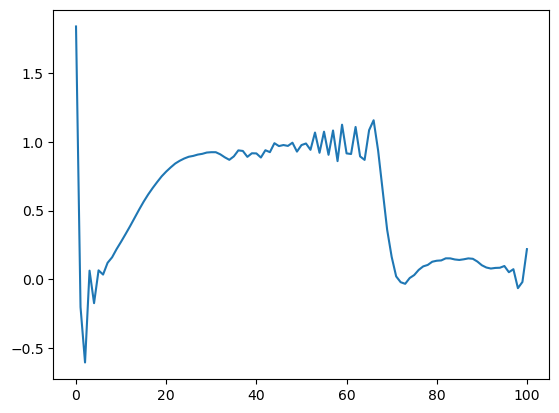

In [24]:
plt.plot(np.square(u) + np.matmul(A,u)- b.reshape(-1,))

In [88]:


# Example parameters
A = np.array([[1, 2], [3, 4]])
b = np.array([1, 2])
u0 = np.zeros_like(b)

# Solve using Newton's method
u_solution = newton_method(F, J_F, u0, A, b)

print("Solution u:", u_solution)

Converged in 7 iterations.
Solution u: [-0.23654315  0.59029524]


In [87]:
result

 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [ 5.898e-28 -4.036e-28 ...  6.647e-28  6.921e-28]
       x: [ 5.898e-28  5.262e-16 ...  2.578e-14  2.631e-14]
    nfev: 84
    njev: 5
    fjac: [[-4.000e-04 -1.000e+00 ... -2.168e-19  8.470e-22]
           [ 8.000e-04 -3.200e-07 ...  4.337e-19 -1.032e-20]
           ...
           [ 9.968e-01 -3.987e-04 ... -1.954e-02 -1.175e-14]
           [-1.176e-14  4.700e-18 ...  9.216e-18 -1.000e+00]]
       r: [-2.500e+03  5.000e+03 ... -4.884e+01 -2.814e-14]
     qtf: [ 4.034e-28  1.579e-30 ...  5.812e-28 -6.921e-28]

In [59]:
np.matmul(A,np.transpose(u0)).shape

(51, 1)

In [29]:
u0.shape

(51, 1)

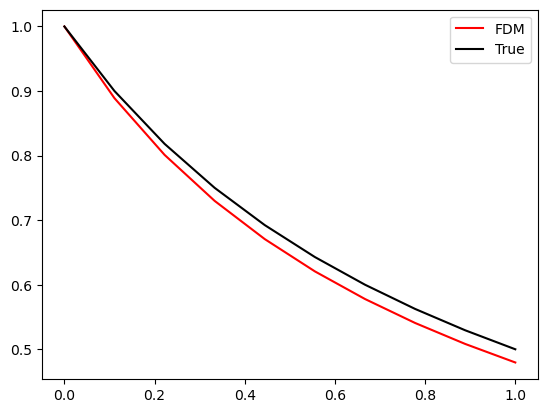

In [11]:
L/(N-1)

0.02040816326530612

In [12]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])